<a href="https://colab.research.google.com/github/jerry3831/Predicting-CGPA-ML/blob/branch-1/predicting_cgpa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# statement:
## This is a machine learning project to check if student mental health affects their CGPA and if so, a machine learnig model should predict CGPA based on given responses in line with students mental health among other information.
## Performed using the studeent mental health dataset with data collected from usniverity students

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data = pd.read_csv('/content/drive/MyDrive/ML Projects/Student Mental health.csv')

# DATA EXPROLATION

In [ ]:
data.shape

(101, 11)

In [ ]:
data.columns

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

## changing column names for better handle

In [17]:
data = data.rename(columns={
    'What is your course?': 'Course',
    'What is your CGPA?': 'CGPA',
    'Marital status': 'Marital_Status',
    'Do you have Depression?': 'Depression',
    'Do you have Anxiety?': 'Anxiety',
    'Do you have Panic attack?': 'Panic_Attack',
    'Did you seek any specialist for a treatment?': 'Specialist',
    'Choose your gender': 'Gender',
    'Your current year of Study': 'Year_Of_Study'
})

## changing all the column names to lower case

In [18]:
data.columns = data.columns.str.lower()

In [ ]:
data.head(10)

### checking basic information of the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   timestamp       101 non-null    object 
 1   gender          101 non-null    object 
 2   age             100 non-null    float64
 3   course          101 non-null    object 
 4   year_of_study   101 non-null    object 
 5   cgpa            101 non-null    object 
 6   marital_status  101 non-null    object 
 7   depression      101 non-null    object 
 8   anxiety         101 non-null    object 
 9   panic_attack    101 non-null    object 
 10  specialist      101 non-null    object 
dtypes: float64(1), object(10)
memory usage: 8.8+ KB


In [ ]:
data.describe()

,age
count,101.000000
mean,20.524752
std,2.484327
min,18.000000
25%,18.000000
50%,19.000000
75%,23.000000
max,24.000000


## DATA PREPROCESSING
### a: checking for missing values

In [ ]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [ ]:
print(missing_data)

                Total   Percent
age                 1  0.009901
timestamp           0  0.000000
gender              0  0.000000
course              0  0.000000
year_of_study       0  0.000000
cgpa                0  0.000000
marital_status      0  0.000000
depression          0  0.000000
anxiety             0  0.000000
panic_attack        0  0.000000
specialist          0  0.000000


### imputing the missing age value by the mean

In [19]:
data['age'].fillna(data['age'].mean(), inplace=True)

In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

timestamp         0
gender            0
age               0
course            0
year_of_study     0
cgpa              0
marital_status    0
depression        0
anxiety           0
panic_attack      0
specialist        0
dtype: int64


### b: changing age values to int and removing timestamp

In [20]:
data['age'] = data['age'].astype(int)
data = data.drop('timestamp', axis=1)

### c: checking for outliers in age and handling them

In [ ]:
IQR = data['age'].quantile(0.75) - data['age'].quantile(0.25)
upper_limit = data['age'].quantile(0.75) + 1.5 * IQR
lower_limit = data['age'].quantile(0.25) - 1.5 * IQR

In [ ]:
print('outliers greater than upper limit: ', data[data['age'] > upper_limit].shape[0])
print('outliers less than lower limit: ', data[data['age'] < lower_limit].shape[0])

outliers greater than upper limit:  0
outliers less than lower limit:  0


## EXPLORATORY DATA ANLYSIS
### a:Univariate analysis

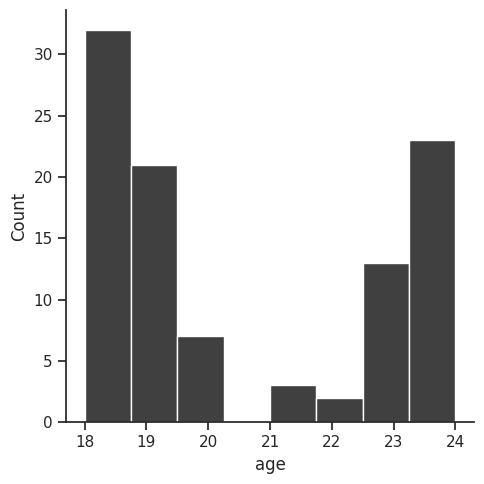

In [ ]:
# plotting all the distributions for the data
sns.set(style="ticks")
sns.displot(data['age'], color='black')

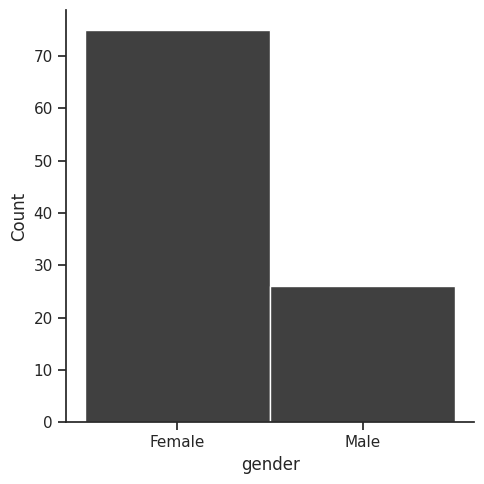

In [ ]:
sns.displot(data['gender'], color='black')

<ipython-input-83-3cca67cf123b>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  cgpa_plot.set_xticklabels(cgpa_plot.get_xticklabels(), rotation=90)


[Text(0, 0, '3.00 - 3.49'),
 Text(1, 0, '3.50 - 4.00'),
 Text(2, 0, '3.50 - 4.00 '),
 Text(3, 0, '2.50 - 2.99'),
 Text(4, 0, '2.00 - 2.49'),
 Text(5, 0, '0 - 1.99')]

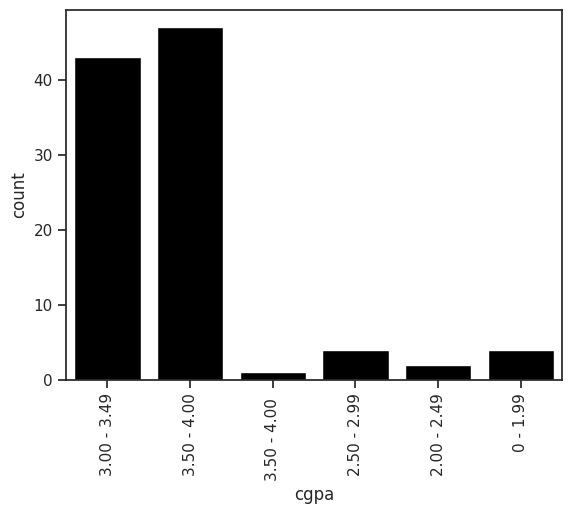

In [ ]:
cgpa_plot = sns.countplot(x='cgpa', data=data, color='black')
cgpa_plot.set_xticklabels(cgpa_plot.get_xticklabels(), rotation=90)

In [ ]:
data.tail()

,gender,age,course,year_of_study,cgpa,marital_status,depression,anxiety,panic_attack,specialist
96,Female,21,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,Male,18,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,Female,19,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,Female,23,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No
100,Male,20,Biomedical science,Year 2,3.00 - 3.49,No,No,No,No,No


### converting qualitative data to numeric for better visualisation and reationship drawing plus modelling

In [21]:
data = data.replace({'Yes' :1, 'No':0})
data = data.replace({'Male':1, 'Female':0})

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['course'] = le.fit_transform(data['course'])

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['year_of_study'] = le.fit_transform(data['year_of_study'])

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['course'] = le.fit_transform(data['course'])

### introducing a feature in average cgpa

In [ ]:
data['cgpa'].nunique()

6

In [25]:
def interval_avg(interval):
  start, end = map(float, interval.split('-'))
  return (start + end) / 2

data['average_cgpa'] = data['cgpa'].apply(interval_avg)

In [26]:
# removing the cgpa original feature
data = data.drop('cgpa', axis=1)

In [ ]:
data['course'].value_counts()

## correlation matrix and heatmap to check for ralationships

In [ ]:
correlation_matrix = data.corr()
print(correlation_matrix)

                  gender       age    course  year_of_study  marital_status  \
gender          1.000000 -0.005896 -0.080491      -0.170877       -0.069389   
age            -0.005896  1.000000 -0.085384       0.209423        0.105350   
course         -0.080491 -0.085384  1.000000       0.119625        0.136272   
year_of_study  -0.170877  0.209423  0.119625       1.000000       -0.018065   
marital_status -0.069389  0.105350  0.136272      -0.018065        1.000000   
depression     -0.143235 -0.070418  0.093920      -0.066243        0.595784   
anxiety         0.059783 -0.091890 -0.034602      -0.127976        0.092606   
panic_attack   -0.023902  0.057072  0.112130      -0.145819        0.275909   
specialist     -0.052168  0.048315 -0.088214      -0.125424        0.349819   
average_cgpa   -0.149679  0.013736  0.119844       0.119801        0.035134   

                depression   anxiety  panic_attack  specialist  average_cgpa  
gender           -0.143235  0.059783     -0.023902 

Text(0.5, 1.0, 'Correlation Matrix')

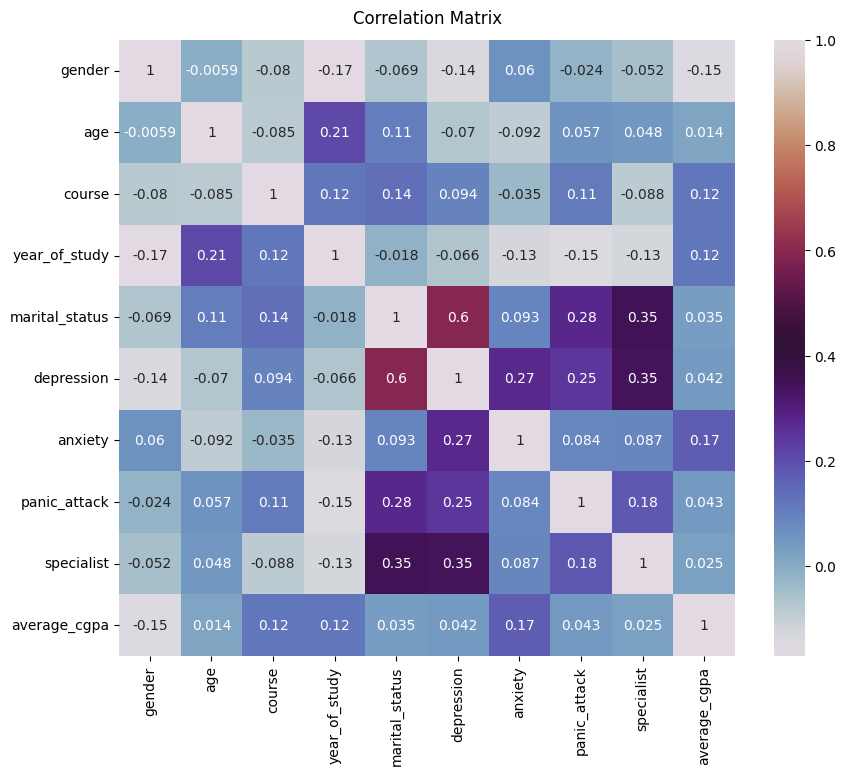

In [ ]:
plt.subplots(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, square=True, cmap='twilight')
heatmap.set_title('Correlation Matrix', fontdict={'fontsize':12}, pad=12)

## drawing relationships from the now encoded data

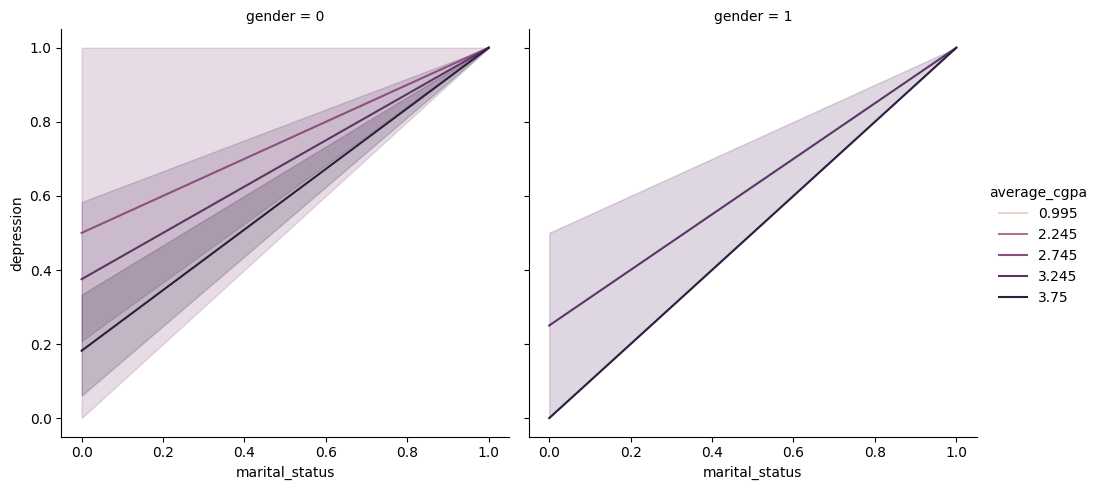

In [ ]:
sns.relplot(x='marital_status', y='depression', col='gender', data=data, kind='line', hue='average_cgpa')

## splitting the dataset into training and testing sets

In [27]:
# initially set predictors and the target
y = data.pop('average_cgpa').to_numpy()
x = data.to_numpy()

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## trying a linear model since cgpa is also about quantification

In [30]:
# try a regression model first
from sklearn.linear_model import LinearRegression
le = LinearRegression()
le.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = le.predict(X_test)

In [34]:
from sklearn.metrics import mean_squared_error, r2_score

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Squared Error: 0.355912143732453
R-squared: -0.09288581549926467


In [36]:
print(X_train)

## using a classifier model
### main reason being we can not quantify the cgpa to be of a certain level
### decision tree classifier

In [35]:
# from sklearn.tree import DecisionTreeClassifier

# tree = DecisionTreeClassifier()
# tree.fit(X_train, y_train)

## Evaluating performance of the decision tree classifier using simple metrics

In [ ]:
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# y_pred = tree.predict(X_test)

# print("Accuracy:", accuracy(y_test, y_pred))
# print("confusion matrix:", confusion_matrix(y_test, y_pred))
# print("classification report:", classification_report(y_test, y_pred))